# Tutoraggio 2

In [1]:
addpath("./functions");
pkg load symbolic

## Esercizio 1

Si consideri la matrice:

$$ A =
 \begin{pmatrix}
  4 & 0 & 1 & 0 \\
  0 & \alpha - 1 & 0 & 0 \\
  1 & 0 & 1 & 0 \\
  0 & 0 & 0 & 2
 \end{pmatrix}
$$

in cui $\alpha$ è parametro reale.

### Punto a

Scrivere una funzione che, preso in input $\alpha$, calcoli il numero di condizionamento in norma infinito di A, utilizzando per il calcolo di $A^{−1}$ la fattorizzazione LU di A. 

Testare la function con $\alpha = 1.2 : 0.05 : 3.2$ e produrre un grafico di $K_{inf}(A)$ in funzione di $\alpha$, confrontando i valori ottenuti con l’output del comando built-in `cond` per il calcolo del numero di condizionamento in norma infinito.

#### Soluzione

Per il calcolo dell'inversa della matrice $A$ di ordine $n$ si risolvono $n$ sistemi lineari sfruttando la fattorizzazione LU, senza strategie di pivoting.

Per il calcolo dell'indice di condizionamento si impiega:

$$ K(A) := \|A\| \|A^{-1}\| $$

In base a quanto visto nello studio del condizionamento dei sistemi lineari.

In [2]:
function [K, K_built] = cond_inf(alpha)

A = [4 0 1 0; 0 alpha-1 0 0; 1 0 1 0; 0 0 0 2];
[L, U, err] = gauss_simple(A);

% Per la risoluzione si sfrutta l'equazione matriciale A * A_inv = I,
% in particolare la forma A * A_inv(:, j) = I(:,j)

A_inv = zeros(4,4);
for j = 1:4
    % aggiornamento del termine noto per la j-esima colonna
    b = zeros(4,1);
    b(j) = 1;

    % in base al valore del termine noto si ottengono i valori
    % della j-esima colonna di A_inv.
    [x, err] = lusolve(L, U, [], [], b);
    A_inv(:,j) = x;
end

% calcolo indice di condizionamento
K = norm(A, inf) * norm(A_inv, inf);
K_built = cond(A, inf);

end

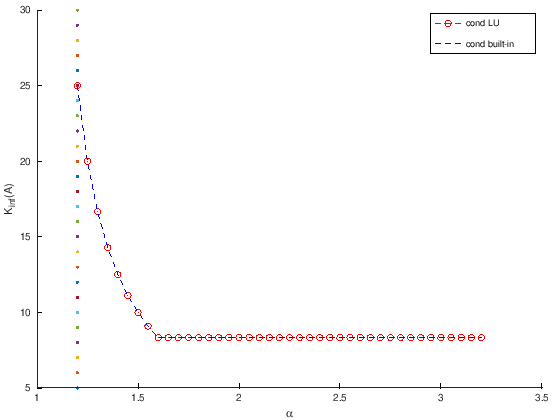

In [3]:
alpha = 1.2 : 0.05 : 3.2;
len_alpha = length(alpha);
K = zeros(len_alpha, 1);
K_built = K;

for i = 1:len_alpha
    [x, y] = cond_inf(alpha(i));
    K(i) = x;
    K_built(i) = y;
end

plot( alpha, K, "ro--", ...
      alpha, K_built, "b--", ...
      1.2, 5:30);
legend("cond LU", "cond built-in")
ylabel('K_{inf}(A)')
xlabel('\alpha');
box off

Per valori di $\alpha$ vicini a $1.2$ l'indice di condizionamento cresce notevolmente, ciò accade perché per $\alpha = 1$ la matrice $A$ è singolare. Ciò si verifica calcolando il determinante di $A$ in funzione di $\alpha$ e trovando gli zeri del polinomio ottenuto.

In [4]:
syms alpha
A = [[4 0 1 0]; 0 alpha-1 0 0; [1 0 1 0]; [0 0 0 2]];
disp('Determinante di A: ')
det(A)
disp('Valori che annullano il determinante: ')
solve(det(A))

Symbolic pkg v2.9.0: Python communication link active, SymPy v1.5.
Determinante di A: 
ans = (sym) 6⋅α - 6
Valori che annullano il determinante: 
ans = (sym) 1


### Punto b

Quando $\alpha = 2$, determinare l’autovalore massimo e minimo di $A$, calcolando l’opportuno zero del polinomio caratteristico mediante il metodo di Newton.

#### Soluzione

Il polinomio caratteristico è pari a: $p_{char} = \det(A - xI)$.

In [5]:
A = double(subs(A, alpha, 2));
syms x
p_char = det(A - x*eye(4))
solve(det(A - x*eye(4)))
x3 = (-sqrt(13) + 5) / 2
x4 = (sqrt(13) + 5) / 2

p_char = (sym)

   4      3       2           
  x  - 8⋅x  + 20⋅x  - 19⋅x + 6

ans = (sym 4×1 matrix)

  ⎡   1   ⎤
  ⎢       ⎥
  ⎢   2   ⎥
  ⎢       ⎥
  ⎢5   √13⎥
  ⎢─ - ───⎥
  ⎢2    2 ⎥
  ⎢       ⎥
  ⎢√13   5⎥
  ⎢─── + ─⎥
  ⎣ 2    2⎦

x3 =  0.69722
x4 =  4.3028


Dato che $\frac{5 - \sqrt(13)}{2} \approx 0.7$ e $\frac{5 + \sqrt{13}}{2} \approx 4.3$ si ha che l'autovalore massimo corrisponde alla soluzione più grande tra le quattro fornite, pari a $\frac{5 + \sqrt(13)}{2}$, mentre la soluzione più piccola è $\frac{5 - \sqrt{13}}{2}$.

Visto che si vogliono calcolare gli zeri corrispondenti all'autovalore massimo e minimo impiegando il metodo di Newton, è necessario calcolare la derivata del polinomio caratteristico.

In [6]:
der_p_char = diff(p_char)

der_p_char = (sym)

     3       2            
  4⋅x  - 24⋅x  + 40⋅x - 19



Bisogna considerare che l'algoritmo per il calcolo degli zeri di funzione che sfrutta il metodo di Newton funziona solo se l'approssimazione iniziale $x_0$ è scelta abbastanza vicino allo zero da trovare. In quel caso, per funzioni non convesse, la convergenza del metodo di Newton è garantita.

Inoltre bisogna assicurarsi di scegliere il punto di innesco in modo da non convergere verso uno zero diverso da quello corrispondente all'autovalore massimo o minimo.

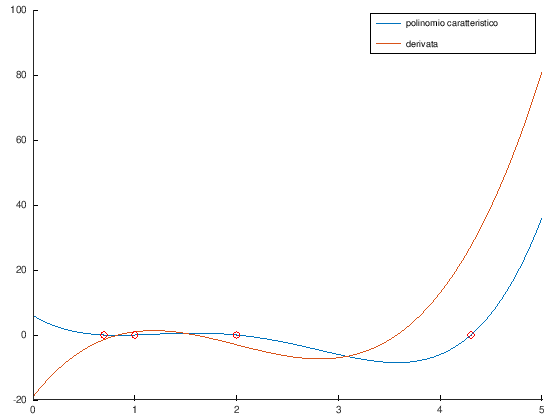

In [7]:
p_char = @(x) x.^4 - 8 * x.^3 + 20 * x.^2 - 19 * x + 6;
der_p_char = @(x) 4 * x.^3 - 24 * x.^2 + 40 * x - 19;

figure
t = linspace(0, 5);
plot( t, p_char(t), ...
      t, der_p_char(t), ...
      1, p_char(1), "ro", ... % zeri di p_char
      2, p_char(2), "ro", ...
      x3, p_char(x3), "ro", ...
      x4, p_char(x4), "ro");
legend("polinomio caratteristico", "derivata");
box off

Considerando la convergenza locale e la distribuzione degli zeri del polinomio caratteristico, si scelgono come punti di innesco per trovare gli zeri di funzione $x_3$ e $x_4$ rispettivamente $(0, p_{char}(0))$ e $(5, p_{char}(5))$.

In [19]:
format long
[x3_newton, appr_x3, nit_x3] = newton(p_char, der_p_char, ...
    0, 10^-12, 10^-12, 100);
[x4_newton, appr_x4, nit_x4] = newton(p_char, der_p_char, ...
    5, 10^-12, 10^-12, 100);
x3_newton
x3
x4_newton
x4

x3_newton =    6.972243622680053e-01
x3 =    6.972243622680054e-01
x4_newton =  4.302775637731996
x4 =  4.302775637731995


L'approssimazione è particolarmente buona e la velocità di convergenza è relativamente elevata.

In [9]:
fprintf("Numero di iterazioni richieste per approssimare x3: %.i\n", ...
    nit_x3);
fprintf("Numero di iterazioni richieste per approssimare x4: %.i\n", ...
    nit_x4);

Numero di iterazioni richieste per approssimare x3: 8
Numero di iterazioni richieste per approssimare x4: 6


## Esercizio 2

Si consideri la matrice $n \times n$: $A = B^T B$

dove `B = (1/n) * hilb(n) + diag(1:n)`.

### Punto a

a) si calcola la fattorizzazione $LL^T$ di $A$ per valori di `n = 10 : 1 : 50` mediante l’algoritmo di Cholesky built-in;


### Punto b

Per ogni `n = 10 : 1 : 50` si determina la soluzione del sistema lineare $Ax = b$ con termine noto `b = A ∗ (1 : n)'` sfruttando la fattorizzazione calcolata al punto a);

### Punto c

Per ogni `n = 10 : 1 : 50` si confronta la soluzione ottenuta al punto b) con quella restituita dal metodo di eliminazione gaussiana senza pivoting, mostrando in un grafico gli errori relativi generati dai due metodi al variare di $n$. Commentare i risultati ottenuti nel grafico.

#### Soluzione

I tre punti, per come sono formulati, possono essere risolti simultaneamente.

In [10]:
n = (10 : 1 : 50);
N = length(n);
err_rel_chol = zeros(N, 1);
err_rel_gauss = zeros(N, 1);

for k = 1:N
    B = (1 / n(k)) * hilb(n(k)) + diag(1:n(k));
    A = B' * B;
    
    x_esatta = (1:n(k))';
    b = A * x_esatta;
    
    [R, p] = chol(A, 'lower');
    %x_chol = lusolve(R, R', [], [], b);
    y = lsolve(R, b);
    x_chol = usolve(R', y);
    
    [L, U, err] = gauss_simple(A);
    x_gauss = lusolve(L, U, [], [], b);
    
    err_rel_chol(k) = norm(x_esatta - x_chol) / ...
        norm(x_esatta);
    err_rel_gauss(k) = norm(x_esatta - x_gauss) / ...
        norm(x_esatta);
end

Le matrici di Hilbert sono il classico esempio di matrici mal condizionate. Tuttavia gli si sta sommando una matrice diagonale, ben condizionata, con termini tutti interi e positivi. Ciò permette di ottenere matrici che non sono particolarmente mal condizionate.

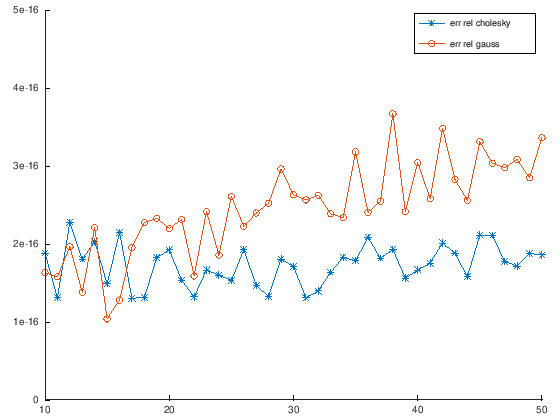

In [17]:
figure
plot( n, err_rel_chol, "-*", ...
      n, err_rel_gauss, "o-");
legend("err rel cholesky", "err rel gauss");
box off

Sia l'algoritmo di Gauss senza strategie di pivoting che l'algoritmo di Cholesky risultano stabili. Ciò significa che le matrici fornite in input sono ben formate. L'errore relativo è molto piccolo $\left(10^{-16}\right)$ e vicino per ordine di grandezza alla precisione di macchina.